# Machine Learning Model to Predicts the Cardiovascular Disease

## 1.Introduction

  This project is focuses on building a Model to predict Cardiovascular Disease.

  The value of a health is more than anything. Here we used some features and values were collected at the moment of medical  examination.

#### Algorithm Used:
   Logistic Regression,KNN Model and GridSearchCV



#### Features:
  1.	Age | Objective Feature | age | int (days)
  2.	Height | Objective Feature | height | int (cm) |
  3.	Weight | Objective Feature | weight | float (kg) |
  4.	Gender | Objective Feature | gender | categorical code |
  5.	Systolic blood pressure | Examination Feature | ap_hi | int |
  6.	Diastolic blood pressure | Examination Feature | ap_lo | int |
  7.	Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
  8.	Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
  9.	Smoking | Subjective Feature | smoke | binary |
  10.	Alcohol intake | Subjective Feature | alco | binary |
  11.	Physical activity | Subjective Feature | active | binary |         
            
#### Target:
   Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

                
                
                

## 2. Solution approach Using Linear Regression

   2.1 Import Necessary Libraries

   2.2 Loading the Cardio Dataset

   2.3 Take a Quick Look at the Data Structure

   2.4.Selecting Features to a Model Build
   
2.5 Information About Data
   
2.6 Data Preprocessing (Analysis (EDA))
   
2.7 Visualize the Data Using graphs
   
2.8 Dealing with Outliers
   
2.9 Dividing the Dataset into Features and Label
   
2.10 Checking the relationship of Features with Label
   
2.12 Checking for the multicollinearity in Features

2.13 Data splitting for training the Model

2.14 Building a Model Using The Logistic Regression
   
2.15 Calculating the Accuracy of Model

### 2.01 Import Necessary Libraries

In [2]:
#Importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 2.02 Lets Load the Cardio Dataset

In [3]:
# Reading the Data from Excel file and creating DataFrame

cardio_train = pd.read_excel("cardio_train.xlsx")

### 2.03 Take a Quick Look at the Data Structure

In [4]:
#Display the first five rows of dataset
cardio_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [38]:
cardio_train.shape

(69301, 11)

Showing the Shape of the dataset is 69301 rows and 13 columns, Now let's move to Data pre-processing

column id and height will delete, because it will not make more impact in model.

##  2.04.Selecting Features to a Model Build

In [5]:
#Lets Delete some Features which not impacting on model
cardio_train=cardio_train.drop(columns=['id','height'])
cardio_train.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,69.0,130,80,2,2,0,0,1,0
1,14648,1,71.0,110,70,1,1,0,0,1,1
2,21901,1,70.0,120,80,1,1,0,0,1,0
3,14549,2,85.0,120,80,1,1,1,1,1,0
4,23393,1,62.0,120,80,1,1,0,0,1,0


### 2.05 Information About Data

In [6]:
# Lets use describe method to know about dataset
cardio_train.describe()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,19468.786280,1.349519,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,2467.261818,0.476821,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,10798.000000,1.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
cardio_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69301 non-null  int64  
 1   gender       69301 non-null  int64  
 2   weight       69301 non-null  float64
 3   ap_hi        69301 non-null  int64  
 4   ap_lo        69301 non-null  int64  
 5   cholesterol  69301 non-null  int64  
 6   gluc         69301 non-null  int64  
 7   smoke        69301 non-null  int64  
 8   alco         69301 non-null  int64  
 9   active       69301 non-null  int64  
 10  cardio       69301 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 5.8 MB


### Points Noted:
 There is No Null Values in Any column.

Weight have minimum is 10KG and maximum is 200KG.

ap_hi(Systolic blood pressure) is minimum -150 and maximum 16020.

ap_lo(Diastolic Blood Pressure) is minimum -70 and maximum 11000.

it looks like data is not correct, lets use realistic data to model build so will drop unrealistic data in preprocessing step.

Other features are normal.

### 2.06 Data Preprocessing (Analysis (EDA))

In [8]:
#Checking the Dataset is balanced or Imbalanced
cardio_train['cardio'].value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

It is Balanced Dataset

### 2.07 Visualize the Data Using graphs

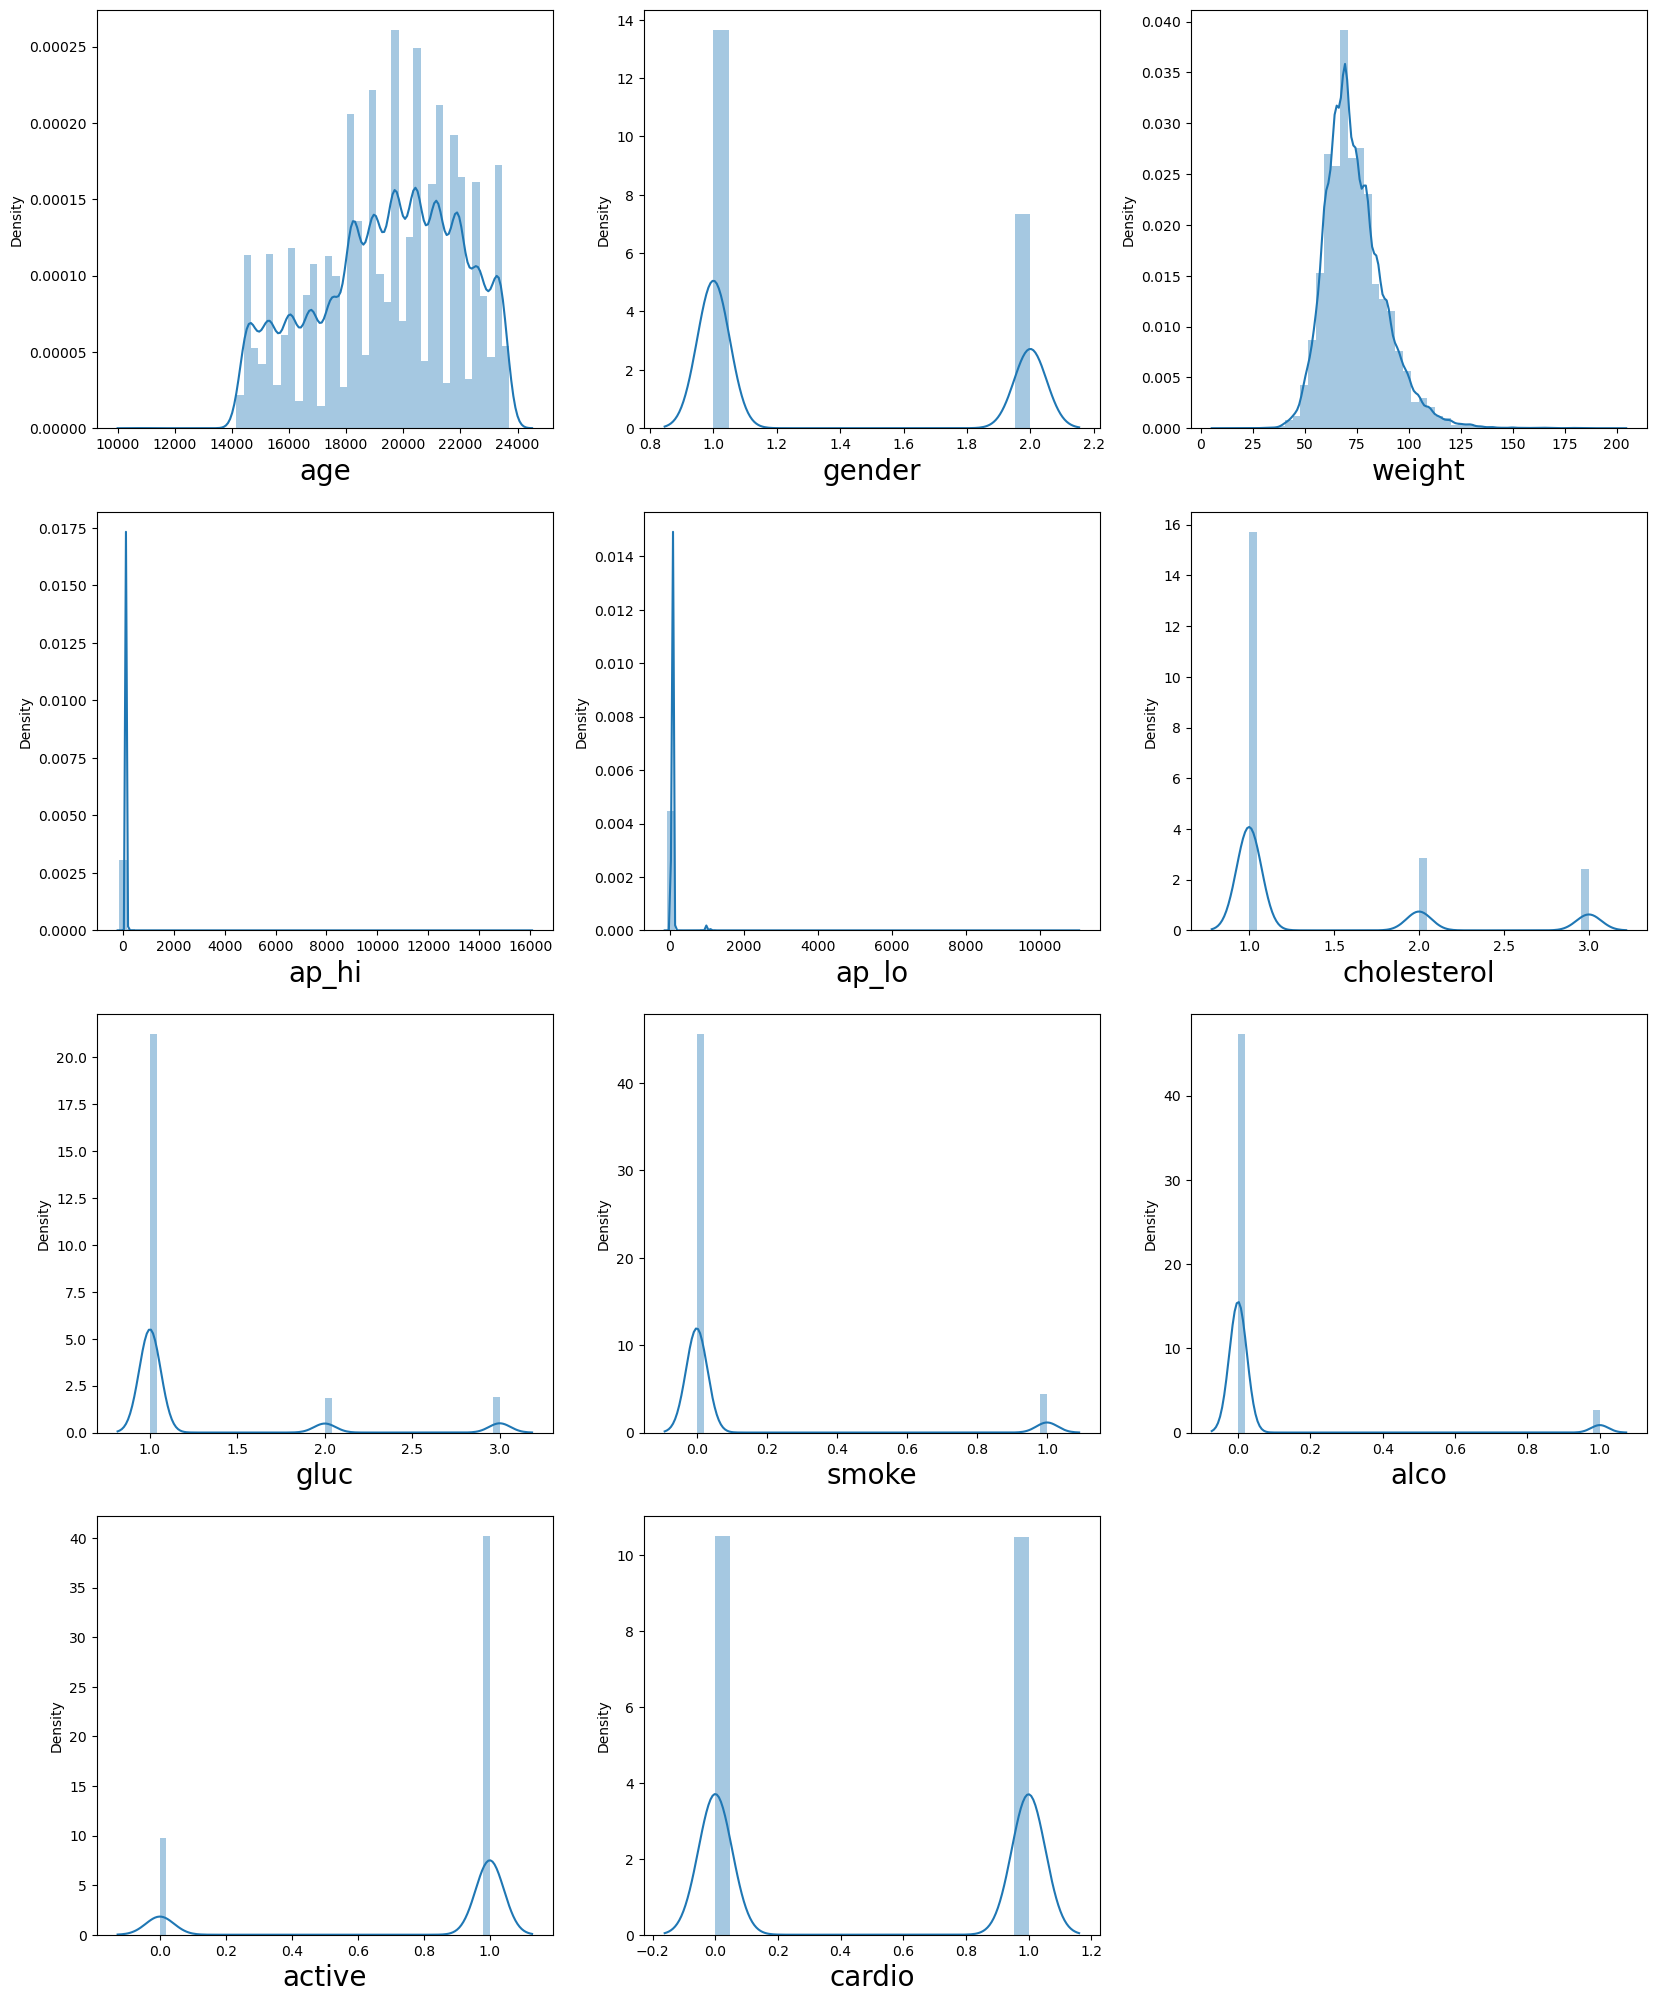

In [9]:
# Checking How the data is distributed for every column using distplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in cardio_train:
    if plotnumber<=12 :     
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(cardio_train[column])
        plt.xlabel(column,fontsize=20)
      
    plotnumber+=1
plt.show()

### 2.08 Dealing with Outliers

In [24]:
#Creating separate dataframe for features
cardio_features = cardio_train.drop('cardio',axis=1)

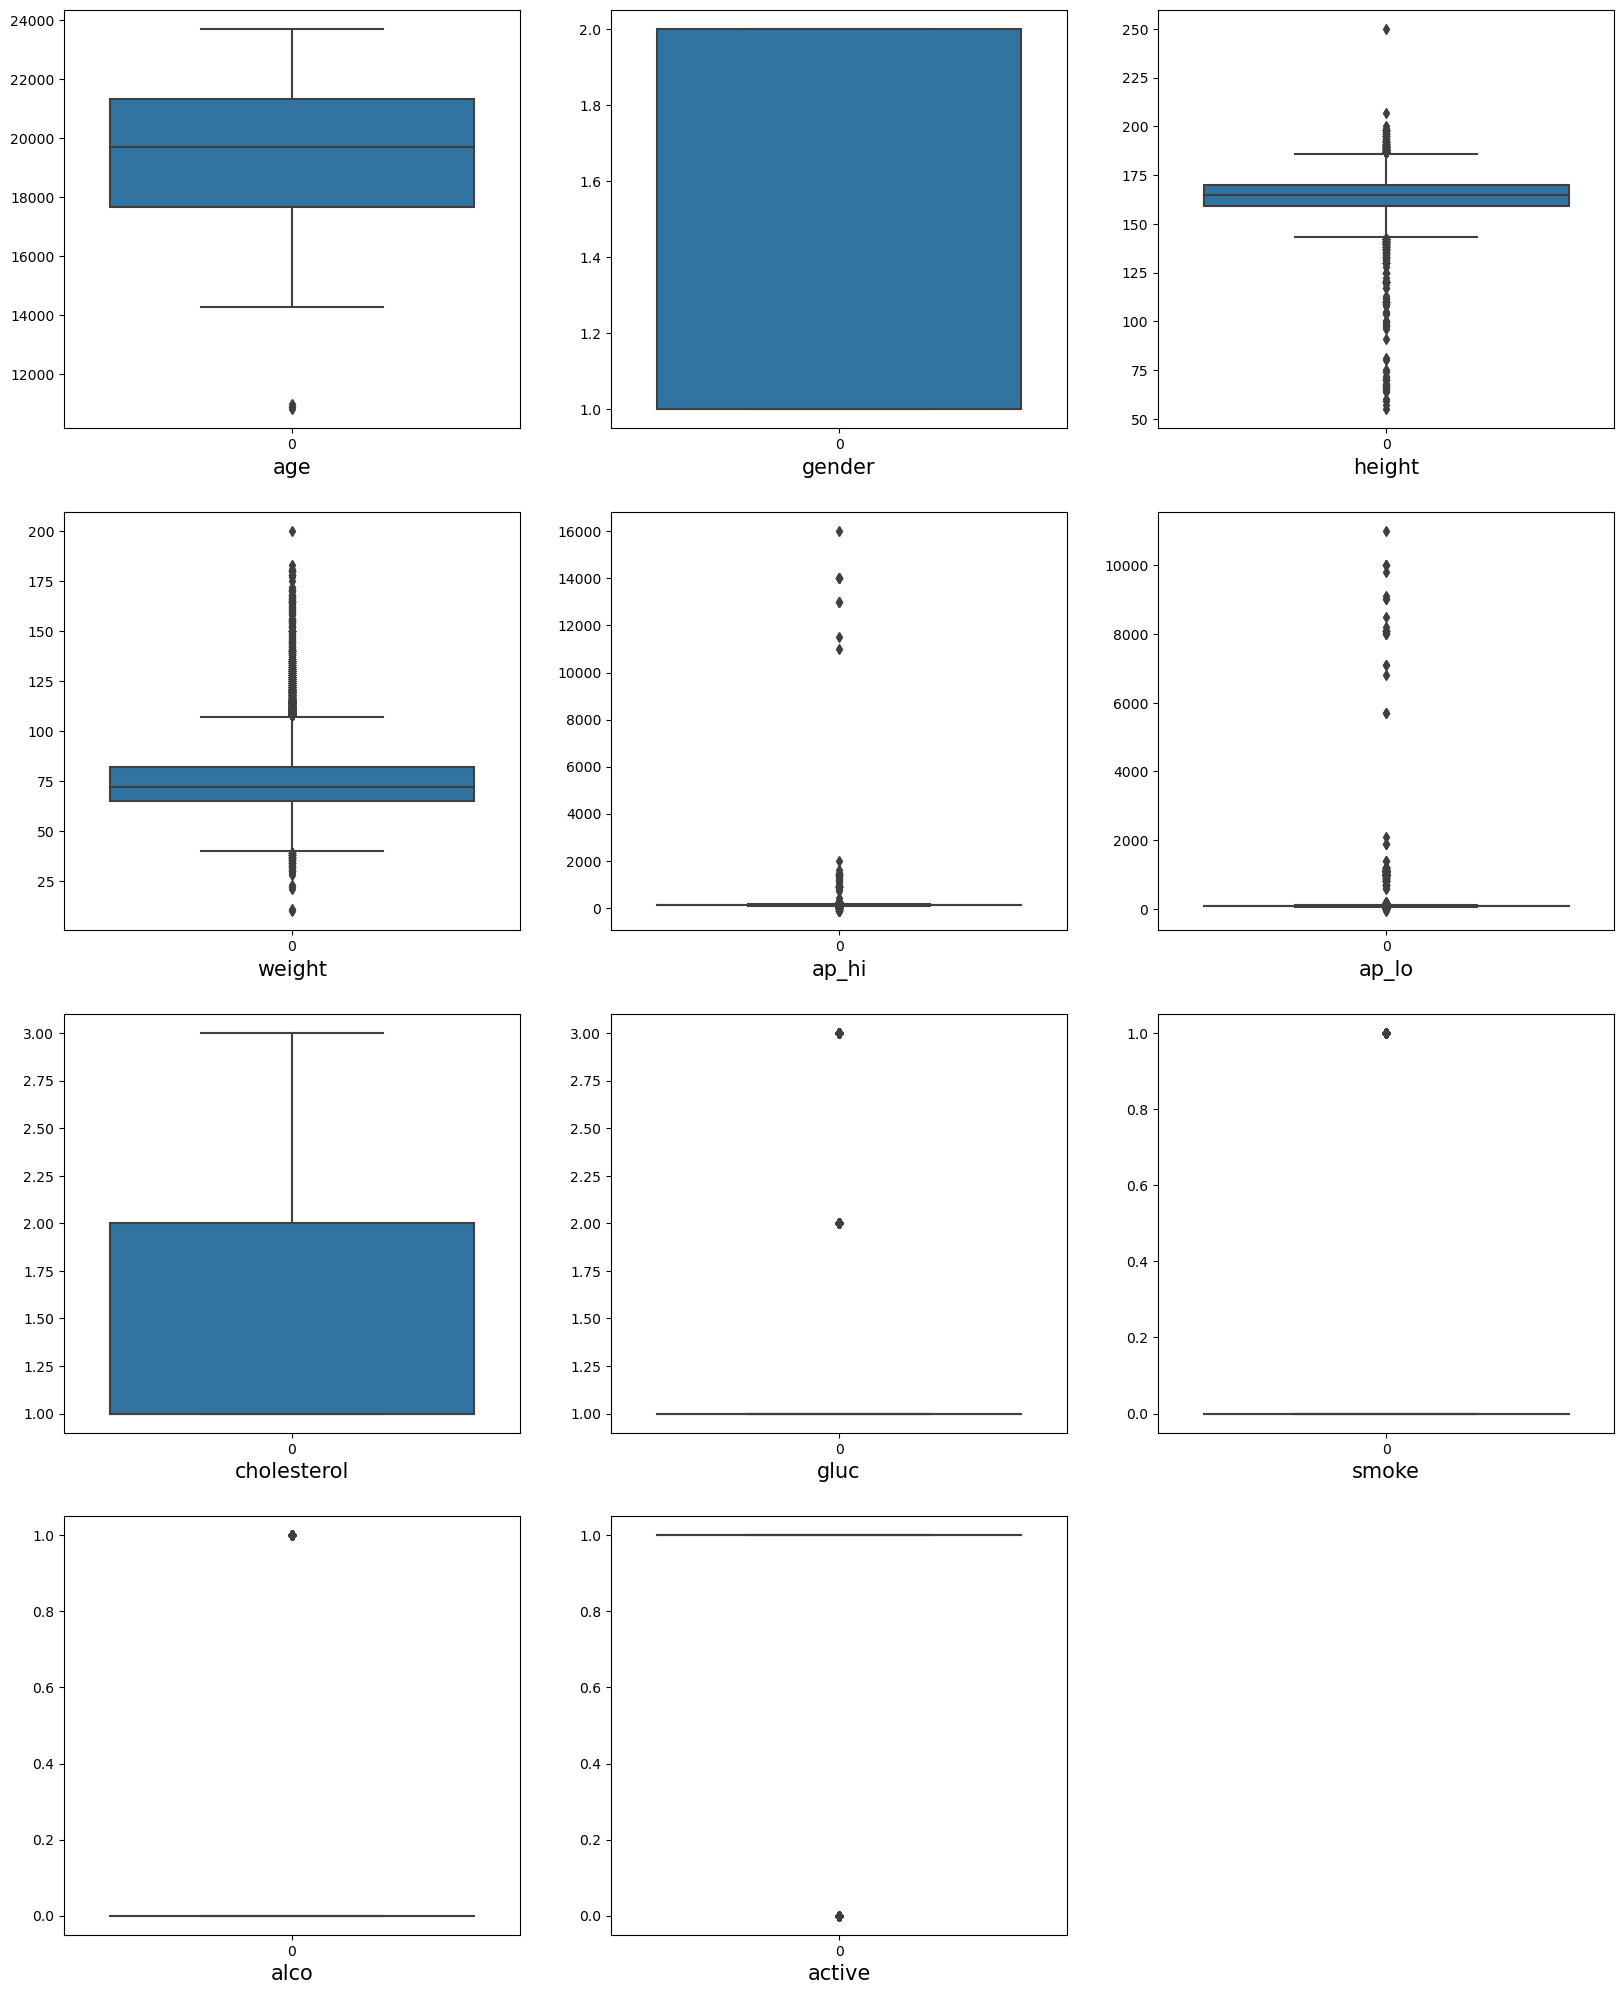

In [25]:
# Visualize the outliers using boxplot
plt.figure(figsize=(20,25))
graph = 1

for column in cardio_features:
    if graph<=12:    
        plt.subplot(4,3,graph)
        ax=sns.boxplot(data= cardio_features[column])
        plt.xlabel(column,fontsize=15)      
    graph+=1
plt.show()

Now will consider, 40<weight<105, 85<ap_hi(Systolic blood pressure)<170, 70<ap_lo(Diastolic blood pressure)<105

In [12]:
#Deleting the unrealistic data by using domain knowledge we can delete it manually.

cardio_train_next=cardio_train[cardio_train['weight']>40]
cardio_train_next=cardio_train_next[cardio_train_next['weight']<105]

cardio_train_next=cardio_train_next[cardio_train_next['ap_hi']>85]
cardio_train_next=cardio_train_next[cardio_train_next['ap_hi']<170]

cardio_train_next=cardio_train_next[cardio_train_next['ap_lo']>70]
cardio_train_next=cardio_train_next[cardio_train_next['ap_lo']<105]


#Lets look at dataset again
cardio_train_next.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,69.0,130,80,2,2,0,0,1,0
2,21901,1,70.0,120,80,1,1,0,0,1,0
3,14549,2,85.0,120,80,1,1,1,1,1,0
4,23393,1,62.0,120,80,1,1,0,0,1,0
7,22547,1,93.0,140,90,2,1,0,0,1,1


In [46]:
cardio_train_next.shape

(51086, 11)

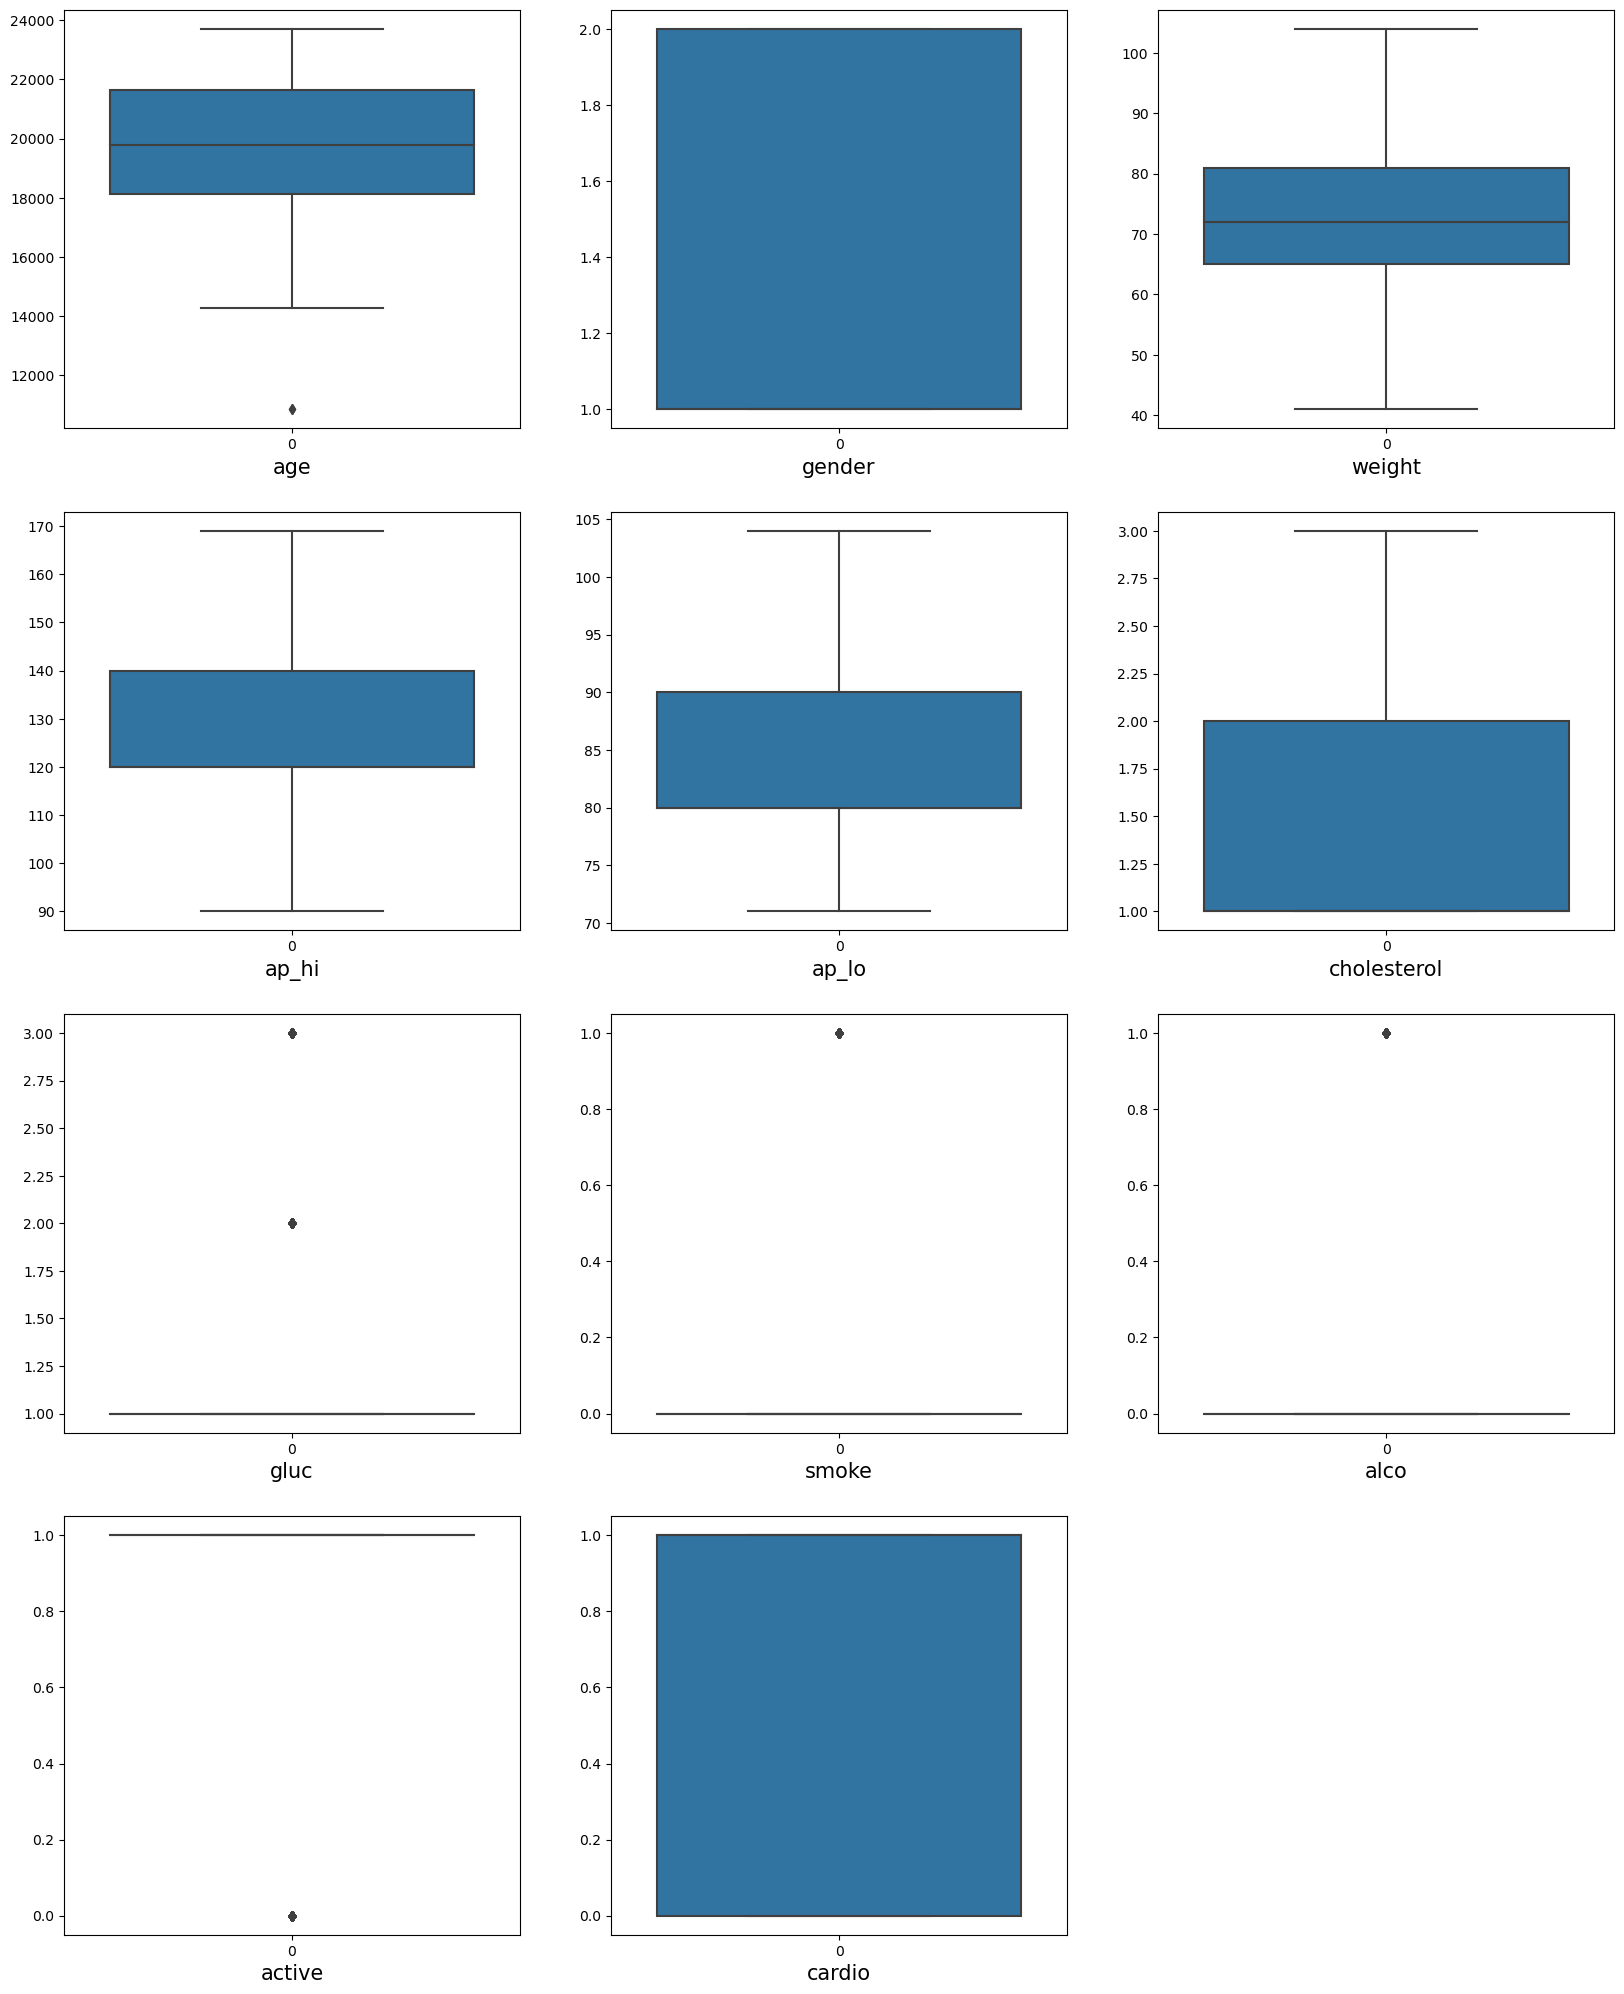

In [13]:
# Now check the outliers using boxplot
plt.figure(figsize=(20,25))
graph = 1

for column in cardio_train_next:
    if graph<=12:    
        plt.subplot(4,3,graph)
        ax=sns.boxplot(data= cardio_train_next[column])
        plt.xlabel(column,fontsize=15)      
    graph+=1
plt.show()

In [15]:
cardio_train=cardio_train_next

In [49]:
cardio_train.shape

(51086, 11)

In [16]:
#Lets check for dataset balance again
cardio_train.cardio.value_counts()

1    27067
0    24019
Name: cardio, dtype: int64

### 2.09 Dividing the Dataset into Features and Label

In [19]:
#Lets separate the label column 'cardio' from the dataset and store in X, also create label dataset

X=cardio_train.drop(columns=['cardio'])
y=cardio_train['cardio']

### 2.10 Checking the relationship of Features with Label

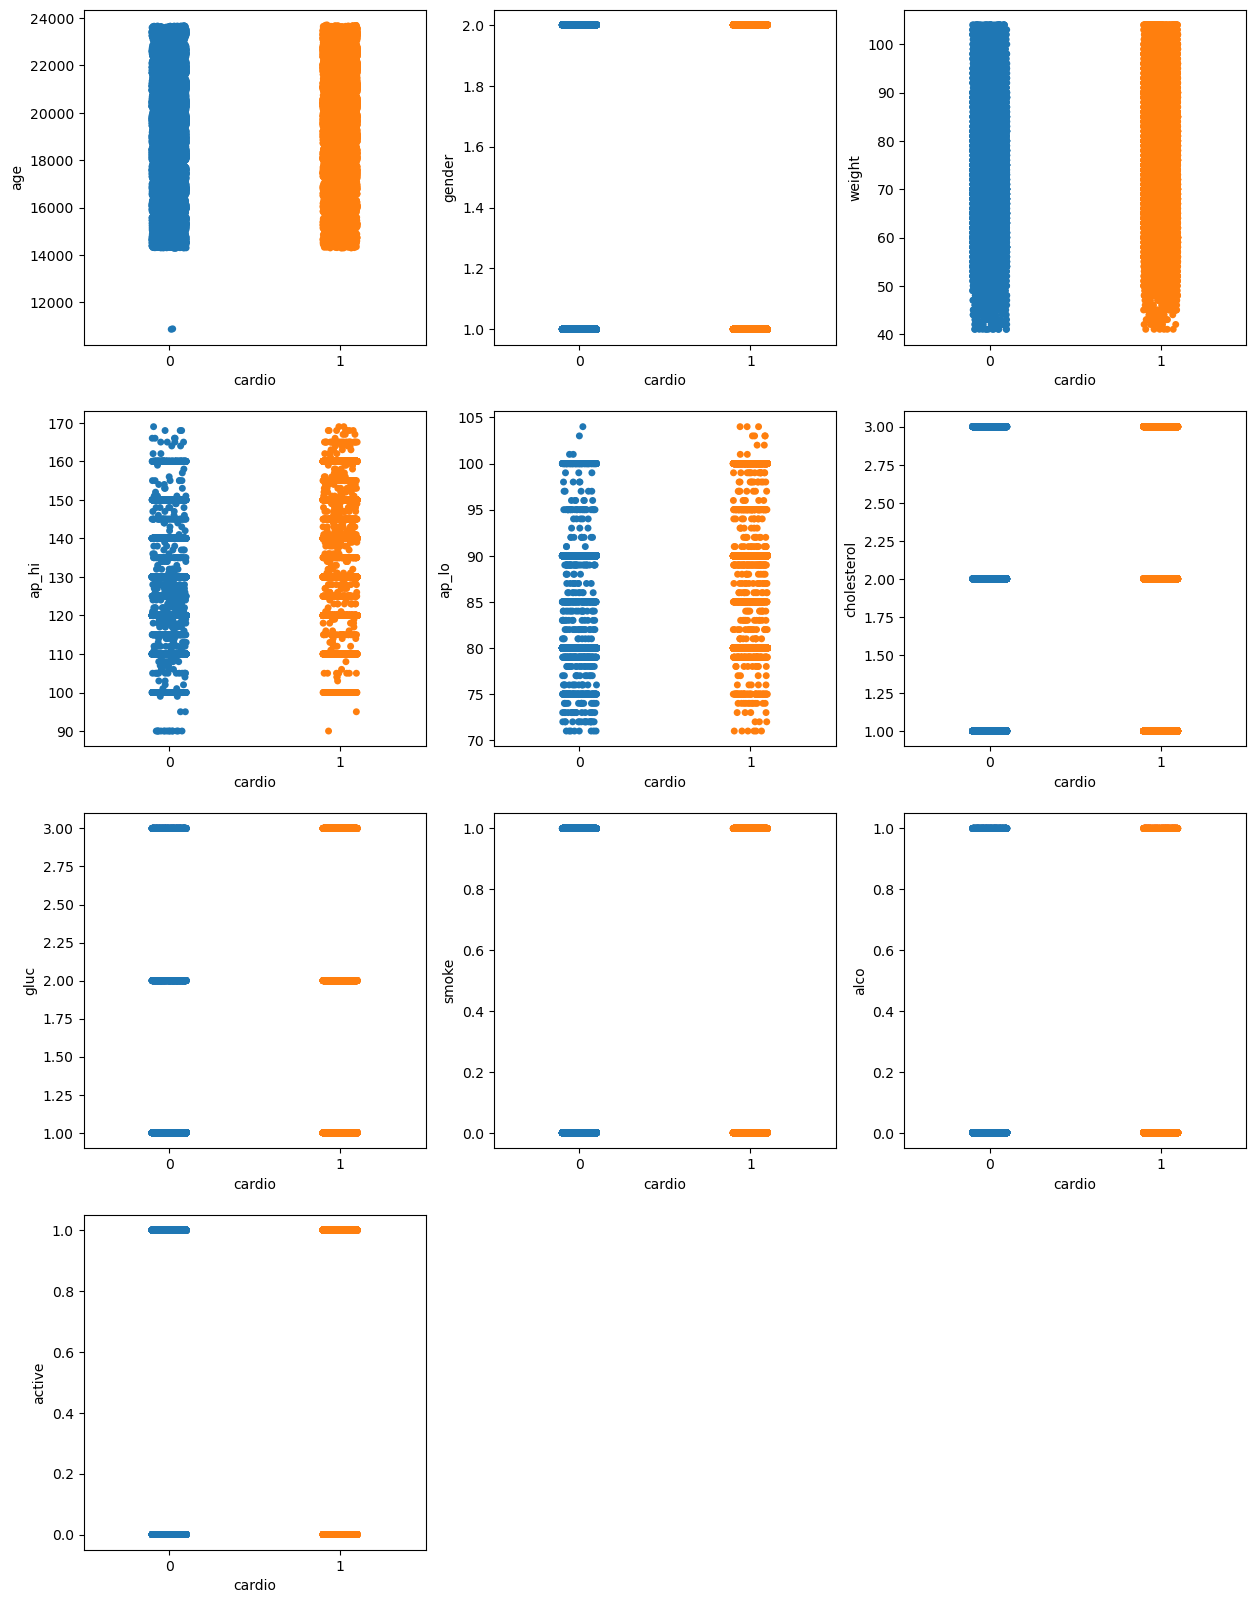

In [52]:
# let's see how features are related to label
plt.figure(figsize=(15,20))
plotnumber = 1

for column in X:
    if plotnumber<=12 :
        ax = plt.subplot(4,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.show()

### 2.11 Scaling the Features

In [20]:
#Scaling the feature using Standard scaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [21]:
X_scaled.shape

(51086, 10)

### 2.12 Checking for the multicollinearity in Features

Now let's find variance inflation factor in each scaled column i.e X_scaled.shape[1] (1/(1-R2)) to know about multicollinearity problem

In [22]:
# Lets create a new dataframe for VIF and lets see the values
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.048278,age
1,1.159408,gender
2,1.078064,weight
3,1.882007,ap_hi
4,1.818947,ap_lo
5,1.317800,cholesterol
6,1.261130,gluc
7,1.253765,smoke
8,1.147748,alco
9,1.001973,active


There is no multicollinearity problem found in features

<function matplotlib.pyplot.show(close=None, block=None)>

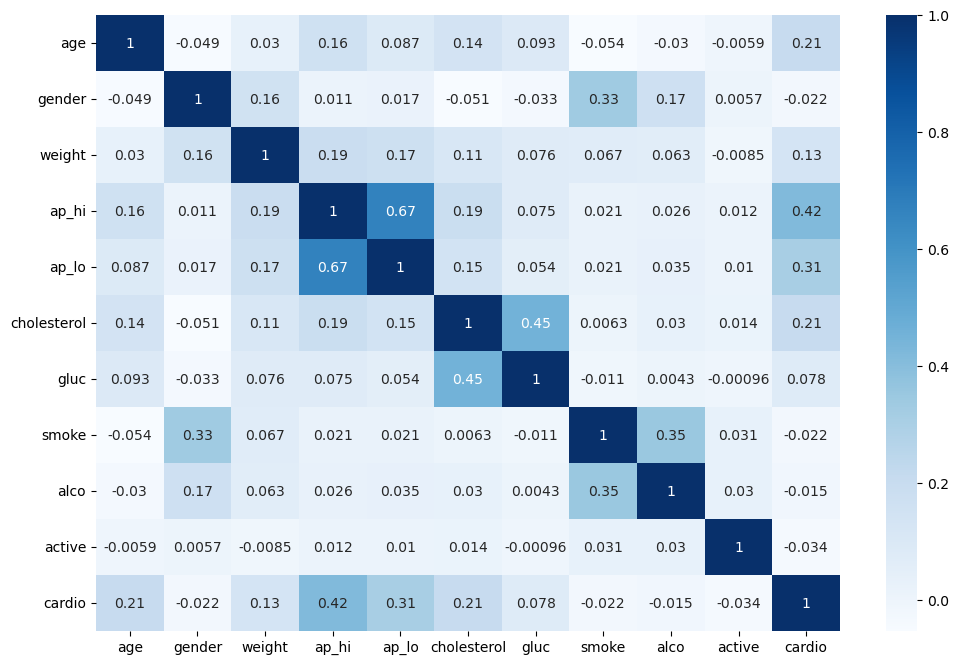

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(cardio_train.corr(),annot=True,cmap='Blues')
plt.show

### 2.13 Data splitting for training the Model

In [28]:
# Split the data for Train and Test
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=1)


### 2.14 Building a Model Using The Logistic Regression

In [29]:
#Building a Model using the Logistic Regression algorithm

cardio_model=LogisticRegression()

In [30]:
cardio_model.fit(x_train,y_train)

LogisticRegression()

Let's check how well our model performs on the train data set.

In [31]:
y_pred=cardio_model.predict(x_train)
y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

Let's check how well our model performs on the Test data set.

In [32]:
y_pred=cardio_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

### 2.15 Calculating the Accuracy of Model

In [33]:
# Model Accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.713044159098027

In [34]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[4473, 1465],
       [2200, 4634]], dtype=int64)

In [35]:
# Manually Accuracy checking

(4473+4634)/(4473+4634+1465+2200)

0.713044159098027

In [36]:
# Lets import necessary library for checking the accuracy
from sklearn.metrics import classification_report

In [37]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71      5938
           1       0.76      0.68      0.72      6834

    accuracy                           0.71     12772
   macro avg       0.72      0.72      0.71     12772
weighted avg       0.72      0.71      0.71     12772



## 3. Solution Approach using KNN


3.1 Importing Libraries

3.2 Building a Model

3.3  Accuracy Calculation and Confusion Matrix

3.4 Hypertune the model using GridSearchCV

3.5 Accuracy Calculation and Confusion Matrix after Tune the Model

### 3.1 Importing Libraries

In [39]:
#Lets import libraries
from sklearn.neighbors import KNeighborsClassifier

In [80]:
X_scaled.shape

(51086, 10)

In [84]:
X_scaled

array([[ 1.17761541, -0.74780434, -0.38898425, ..., -0.30867286,
        -0.23566817,  0.49564685],
       [ 0.94202568, -0.74780434, -0.30473952, ..., -0.30867286,
        -0.23566817,  0.49564685],
       [-2.10736825,  1.33724819,  0.95893142, ...,  3.23967584,
         4.24325445,  0.49564685],
       ...,
       [-0.16167906,  1.33724819,  0.20072886, ...,  3.23967584,
        -0.23566817,  0.49564685],
       [ 1.16185413, -0.74780434, -0.13625006, ..., -0.30867286,
        -0.23566817, -2.01756554],
       [ 0.3775228 , -0.74780434, -0.13625006, ..., -0.30867286,
        -0.23566817,  0.49564685]])

### 3.2 Building a Model

In [87]:
# Buidling model
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state= 355)

knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)


In [88]:
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

### 3.3  Accuracy Calculation and Confusion Matrix

In [40]:
#Confusion Matrix
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[4473, 1465],
       [2200, 4634]], dtype=int64)

In [90]:
#Classification Report
print (classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66      6055
           1       0.69      0.71      0.70      6717

    accuracy                           0.68     12772
   macro avg       0.68      0.68      0.68     12772
weighted avg       0.68      0.68      0.68     12772



### 3.4 Hypertune the model by using GidsearchCV

In [91]:
#Lets import library
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid = { 'algorithm' : ['kd_tree', 'brute'],
               'leaf_size' : [3,5,6,7,8],
               'n_neighbors' : [3,5,7,9,11,13]
              }

In [93]:
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)

In [94]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [95]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

In [96]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size =3, n_neighbors =13)

In [97]:
#Building the tuned model
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=13)

In [98]:
y_pred = knn.predict(x_test)

### 3.5  Accuracy Calculation and Confusion Matrix after Tune the model

In [99]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[4178, 1877],
       [1894, 4823]], dtype=int64)

In [100]:
print (classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      6055
           1       0.72      0.72      0.72      6717

    accuracy                           0.70     12772
   macro avg       0.70      0.70      0.70     12772
weighted avg       0.70      0.70      0.70     12772



Accuray increased 2% after tuning by using GridSearchCV method

## 4. Results

### 4.1 Using Logistic Regression:

##### Model Accuracy:  0.71



### 4.2 Using KNN Model:

##### Model Accuracy:  0.68



### 4.2 Using KNN Model after HyperTune:

##### Model Accuracy:  0.70


## 5. Conclusion

There are real world problems that can be solved with machine learning. Some of these solutions can take real world data and make very accurate predictions that can be useful to our daily lives. Users can leverage the power of machine learning without being data scientist when easy to use applications are built around some of these complicated models.